# Google Playstore Analysis

### import Important Liabraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## import csv 

In [2]:
#reading file from our folder
df = pd.read_csv("C:/Users/win/Desktop/working roject/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
#count no of null values in column 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#changing the columns name 
df.rename({'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver' },axis=1,inplace=True)

# TASK 

## 1.Data Clean up - missing values treatment 


### a.Drop records where rating is missing since rating is our target .

In [9]:
df.isnull().sum()  #ratings has max no of null values..

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [11]:
#index no where null are 
df[df["Rating"].isnull()].index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [12]:
#dropping the null values from the rating column 
df.drop(index=df[df['Rating'].isnull()].index,inplace = True)

In [13]:
df.shape

(9367, 13)

In [14]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       3
dtype: int64

# b.Check the null values for the android ver

In [15]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,21M,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


#### i. are all three having same problem ?

  yes all three having same problem.

### ii . replacing missing value with the mode 

In [16]:
# find the mode of Android ver column   
df["Android_Ver"].mode()   

0    4.1 and up
dtype: object

In [17]:
# lets store mode into variable .
x = df["Android_Ver"].mode()[0] 
x

'4.1 and up'

In [18]:
# filling those null values with the mode() value

df["Android_Ver"].fillna(x,inplace = True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       0
dtype: int64

# c.Current - ver replace with most common value (mode) 

In [20]:
# finding null entries 
df[df["Current_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,27M,"5,000+",Free,0,Everyone,Art & Design,6-Jun-18,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,87M,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up


In [21]:
#replace it with most common value 
## first lets find out mode 

df["Current_Ver"].mode()[0]

'Varies with device'

In [22]:
mcv = df["Current_Ver"].mode()[0]
mcv

'Varies with device'

In [23]:
#filling null with mode
df["Current_Ver"].fillna(mcv,inplace = True)

In [24]:
df.isna().sum() #one more column left Content_rating 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

# d. Content_Rating Droping null 

In [25]:
df[df["Content_Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,4.1 and up


In [26]:
#drop this null 
df.drop([10472],inplace = True)

In [27]:
# lets check nulls now 

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

**we got rid of null values lets go for another task .**

# 2.Data clean up - correcting the data types

## a.which all variable needs to be brought to numeric types ? 

In [28]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


__From this information, we can see that, the column Reviews, Installs and Price have the numeric data so we can convert these columns into the numeric types, but there are also 2 columns which are Current Ver and Android Ver can be conevert into the numeric type but in those columnn there are some strig values which we can drop it or replace it

# b.Price variable remove $ sign 

In [30]:
# here we are replacing the $ amd also converting the type of it to the numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\win\AppData\Local\Temp/ipykernel_16280/3908950467.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# c. installs -  remove commas , and Add sign + . Convert to Integer 

In [32]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',"").str.replace('+',""))

C:\Users\win\AppData\Local\Temp/ipykernel_16280/3493056612.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',"").str.replace('+',""))


In [33]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


\*From the given info, we have already converted the identifies columns into the numeric type so now, there are no such columns which we need to convert to numeric type\*

## d.Size - remove M ,K and varfies with devices Cleaning the column 

In [35]:
df.Size.unique()

array(['19M', '14M', '87M', '25M', '28M', '56M', '29M', '33M', '31M',
       '12M', '20M', '21M', '37M', '27M', '55M', '17M', '39M', '42M',
       '23M', '60M', '61M', '46M', '92M', '52M', '11M', '24M',
       'Varies with device', '94M', '15M', '10M', '26M', '80M', '79M',
       '57M', '35M', '54M', '201k', '36M', '86M', '70M', '16M', '34M',
       '89M', '38M', '32M', '18M', '22M', '45M', '98M', '90M', '67M',
       '30M', '71M', '64M', '82M', '49M', '95M', '50M', '59M', '13M',
       '73M', '68M', '40M', '91M', '23k', '65M', '75M', '51M', '41M',
       '48M', '85M', '83M', '43M', '47M', '78M', '88M', '66M', '79k',
       '84M', '118k', '44M', '695k', '62M', '53M', '72M', '58M', '96M',
       '63M', '77M', '93M', '81M', '69M', '74M', '97M', '556k', '526k',
       '76M', '334k', '100M', '99M', '232k', '624k', '85k', '41k', '292k',
       '11k', '704k', '862k', '899k', '378k', '266k', '375k', '975k',
       '980k', '696k', '544k', '525k', '920k', '779k', '853k', '720k',
       '713k', 

In [36]:
# as we can see that we have some values in the size column as varies with device.so lets check how many is this ?
(df["Size"] == 'Varies with device').sum()

1637

- as we can see that it is very big number that 1695 rows are filled up with Varies with device Lets make some changes.
- 1st we have to convert them into null values and then we can fill null values into the mean.
- so befor doing this we can make changes in the other values of size like 19m we gonna make it 19million in values



In [37]:
#m to million 

df['Size']= df['Size'].apply(lambda x : np.float(x.replace('M',''))* 1000 if type (x) != float and "M" in x else x)

C:\Users\win\AppData\Local\Temp/ipykernel_16280/3721361557.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Size']= df['Size'].apply(lambda x : np.float(x.replace('M',''))* 1000 if type (x) != float and "M" in x else x)


In [38]:
#k to thousand 
df['Size']= df["Size"].apply(lambda x : np.float(x.replace("k",""))/1000 if type(x) !=  
                             float and "k" in x else x)

C:\Users\win\AppData\Local\Temp/ipykernel_16280/3629343130.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Size']= df["Size"].apply(lambda x : np.float(x.replace("k",""))/1000 if type(x) !=


In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [40]:
# now deal with "varies with device"
df['Size'].replace({'Varies with device' : None},inplace = True)


In [41]:
# so we replace varies with device to null values ,now we have to replace null values with mean().
(df["Size"] == 'Varies with device').sum()

0

In [42]:
df['Size'].mean() #avg size of an app is almost correct according to google as well that mean we are on right track .

39757.29213611079

In [43]:
size_avg = df['Size'].mean()
size_avg

39757.29213611079

In [44]:
df["Size"].fillna(size_avg,inplace = True)

In [45]:
df['Size'].isna().sum()

0

** so we replace null values with mean of size **

# 3.logical checks - check and handle.

**a.Avg. rating should be between 1 and 5, as only these values are allowed on the play store**

*i. are there any such records ? Drop if so.*

In [46]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [47]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


There are no such records which having rating greater than 5,so we don't need to drop anythingh .

**b.Reviews should not be more than installs as only those who installed can review the app.**

*i. are there any such records ? drop if so ?*

In [48]:
# changing data type of reviews 
df['Reviews']= pd.to_numeric(df['Reviews'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [50]:
# how many records having more reviews than installs.
sum(df['Reviews'] > df['Installs']) 

7

In [51]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [52]:
df.drop(index=df[df['Reviews'] > df['Installs'] ].index,inplace= True )

In [53]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


*After performing the operations, we found 7 such records which were greater than the installs so we droped those records So, now there are no such records that is Review which are greater than the installs*

# 4.Identify and handle outlier - 

**a.Price Column**

**i.Make suitable plot to identify outlier in price** 

<AxesSubplot:>

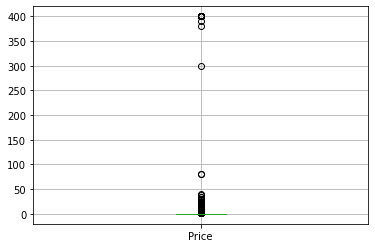

In [54]:
df.boxplot('Price')

*So, after ploting the boxplot for the Price column, we can see that there are some outliers present in the price column And from this we can assume that, there are outliers beyond value 50*

**ii. Do you expect apps on the play store to cost $200? Check out these cases.**

In [55]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,15000.000,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.000,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,73000.000,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,18000.000,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,87000.000,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,26000.000,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,47000.000,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,29000.000,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.000,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up


In [56]:
sum(df['Price'] >200) 

15

In [57]:
df[df['Price'] > 200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [58]:
df.drop(index= df[df['Price'] > 200].index,inplace= True)

In [59]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


*Here we have droped the records which are greater than 200 (cost more than 200)*

**iii. After dropping the useless records, make the suitable plot again to identify outliers**

<AxesSubplot:>

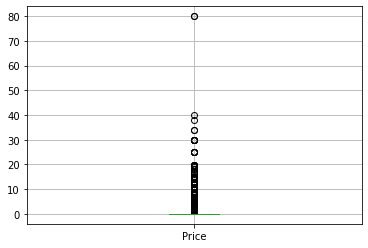

In [60]:
df.boxplot('Price')

__After ploting the boxplot for the price column, we got some outliers which we can see and we can say that the outliers are beyond 50 or we can also say that there are outliers beyond the average line so we can also drop that__

**iv.Limit data to records with price < $30**

In [61]:
sum(df['Price']<30)

9338

__b.Reviews column__

__i.Make suitable plot__

<function matplotlib.pyplot.show(close=None, block=None)>

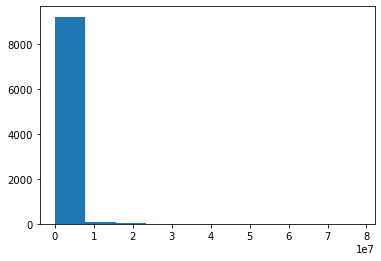

In [62]:
h= df['Reviews']
plt.hist(h)
plt.show


**ii.limit data to app with < 1 million reviews**

In [63]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [64]:
df[df['Reviews']<1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.000000,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,26000.000000,500,Free,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000.000000,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,39757.292136,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


**c.Installs** 

### i.What is the 95th percentile of the installs ?

In [65]:
# getting the values of the Installs column with 95th percentile
df['Installs'].quantile(0.95)

100000000.0

### ii. Drop records having a value more than the 95th percentile.

In [66]:
df[df['Installs']>df['Installs'].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,39757.292136,1000000000,Free,0.0,Teen,Books & Reference,3-Aug-18,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,39757.292136,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,39757.292136,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,39757.292136,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,39757.292136,1000000000,Free,0.0,Everyone,Communication,2-Aug-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,39757.292136,1000000000,Free,0.0,Everyone,Photography,1-Aug-18,Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000.000000,500000000,Free,0.0,Everyone,Health & Fitness,31-Jul-18,5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,39757.292136,1000000000,Free,0.0,Teen,Entertainment,16-Jul-18,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,39757.292136,500000000,Free,0.0,Everyone,Tools,4-Aug-18,4.6.6,Varies with device


In [67]:
df[df['Installs']>df['Installs'].quantile(0.95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [68]:
# here dropping all the values which are more than 95th percentile 
df.drop(index=df[df['Installs']>df['Installs'].quantile(0.95)].index,inplace=True)

- Here, we have droped all the Installs Values which are more than 95th percentile

# Data analysis to answer business questions 

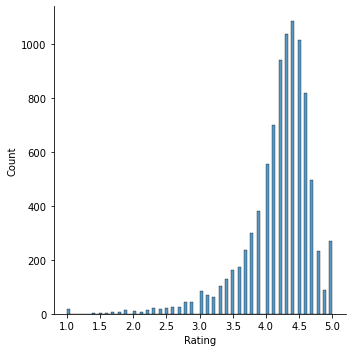

In [69]:
sns.displot(df.Rating)
plt.show()

In [70]:
#finding the skewed value for a Rating column 
df['Rating'].skew()

-1.8416513505231236

**a.How do you explaine this ?**

 - So, from the above plot we can see that the skewed value is at the left side which is negative, so we can say that the given column or the given plot is left skewed

**b. What is the implication of this on your analysis?**

If we have more data then generally there is skewed value present in that dataset.And if there is too many skewed values present in the dataset that is too much skewness present in the coloumn then whatever the model we have, it does't work properly (Statistical Model) So, if we have skewness data and if it's at the right side then it is right skewed data and if the skewness is at the left side then it is left skewed data that is ther are negative values So, to overcome from this and to get the right output from the analysis we can remove this skewness and we can convert it into the bell curve that is the mean is at the centre.

## 6.What are top content Rating values ?

In [71]:
df['Content_Rating'].value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

**a. Are there any values with very few records?**

In [72]:
df['Content_Rating'].value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

So, after analysis we found that an Adults only 18+ and Unrated have very few records that is 3 and 1 respectively

**b.If yes, drop those as they won’t help in the analysis**

In [73]:
# finding the Unrated value in the contect rating column
df[df['Content_Rating']=='Unrated'].index

Int64Index([8266], dtype='int64')

In [74]:
# finding the Adults only 18+ value in the contect rating column
df[df['Content_Rating']=='Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [75]:
# droping all the values in the given column with given records
df.drop(index=df[df['Content_Rating']=='Unrated'].index, inplace=True)
df.drop(index=df[df['Content_Rating']=='Adults only 18+'].index,inplace=True)

In [76]:
df['Content_Rating'].value_counts()

Everyone        7309
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content_Rating, dtype: int64

So, after the operations we found that, the given data doesn't have any value in the Content Rating column with Unrated and Adults only 18+

# 7.Effect of size on rating 

#### a.Make a joinplot to understand the effect of size on rating.

In [77]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

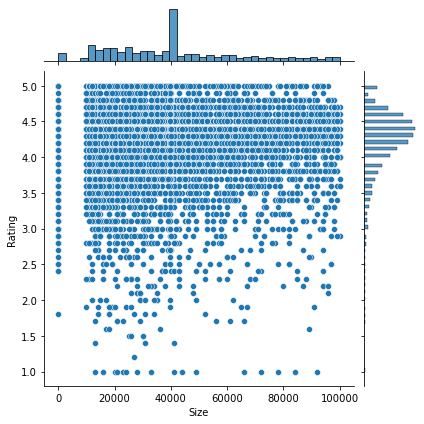

In [85]:
sns.jointplot(x='Size',y='Rating',data=df)
plt.show()

### b.do you see any pattern ?

- yes from the given plot,we can say that there is correlation between Size and Rating.

### c.How do you explain the pattern?

- From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

# 8. Effect of price on rating ?

### a.Make jointplot (with reggression line)

<function matplotlib.pyplot.show(close=None, block=None)>

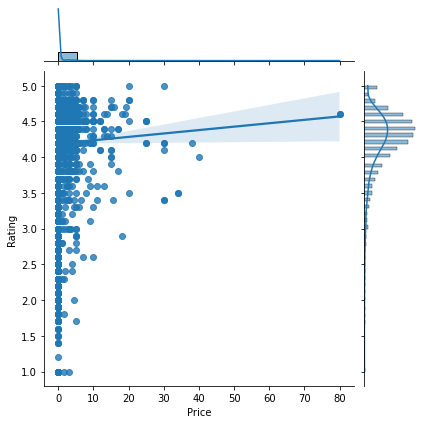

In [86]:
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')
plt.show

### b. What pattern do you see?

- From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

### c. How do you explain the pattern?

- So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price

### d.Replot the data, this time with only records with price > 0.

In [88]:
greatervalue=df[df['Price']>0]
greatervalue

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,68000.000000,100000,Paid,4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,68000.000000,100000,Paid,4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,39757.292136,100000,Paid,3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.000000,1000000,Paid,0.99,Everyone,Arcade,8-Jun-18,2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,0.861000,100,Paid,0.99,Everyone,Personalization,25-Apr-18,0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,24000.000000,1000,Paid,7.99,Everyone,Health & Fitness,8-Aug-18,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.000000,10000,Paid,16.99,Teen,Action,27-Feb-15,2.22,5.0 and up


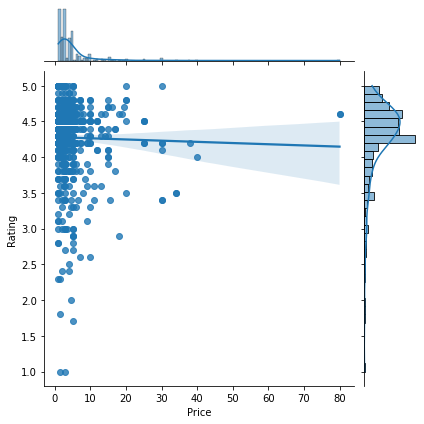

In [89]:
sns.jointplot(x='Price',y='Rating',data =greatervalue,kind='reg' )
plt.show()

### e.does the pattern change?

Yes, the pattern has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

### f. What is your overall inference on the effect of price on the rating

So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

# 9. Look at all the numeric interactions together –

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'.

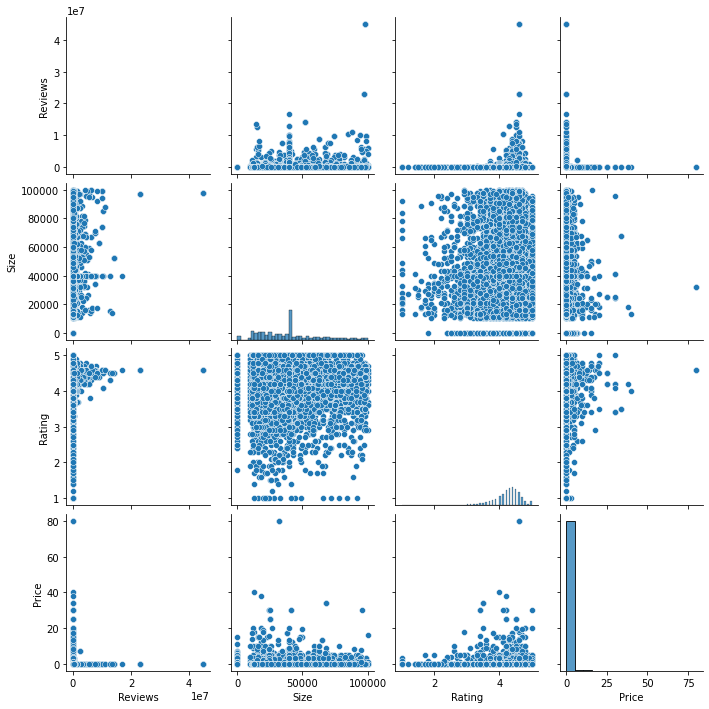

In [90]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'])
plt.show()

# 10.Rating vs content Rating

### a. Make a bar plot displaying the rating for each content rating

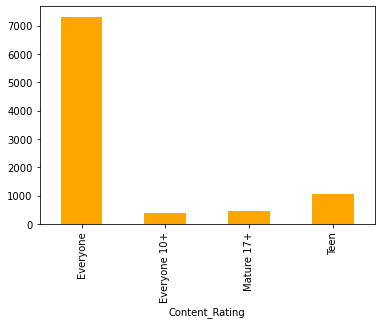

In [95]:
df.groupby(['Content_Rating'])['Rating'].count().plot.bar(color='orange')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

Here, we will use Median as we have outlier in the Rating. And, Median is the best measure of central tendency to overcome the outlier

### c. Choose the right metric and plot

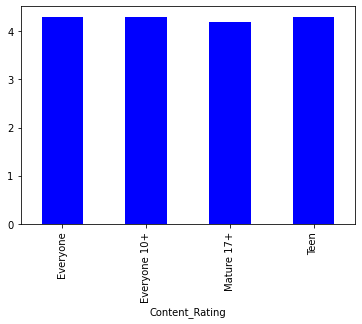

In [96]:
df.groupby(['Content_Rating'])['Rating'].median().plot.bar(color='blue')
plt.show()

# 11.Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [98]:
#creating bins (buckets) of the given dataset and then we're giving labels to it. Basically creating the 5 gourps of the dataset 
bins=[0,20000,40000,60000,80000,100000]
labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k']
df['Bucket']=pd.cut(df['Size'],bins,labels=labels)
pd.pivot_table(df,index='Bucket',values='Rating',columns='Content_Rating')

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,4.150780,4.336364,3.947674,4.179897
20k-40k,4.204738,4.186702,4.156098,4.232222
40k-60k,4.172760,4.281356,4.242500,4.212766
60k-80k,4.192950,4.301961,4.062222,4.281553
80k-100k,4.187226,4.347826,4.150000,4.320833


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [99]:
quant=pd.pivot_table(df, values='Rating', index='Bucket', columns='Content_Rating', aggfunc=lambda x:np.quantile(x,0.2))
quant

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.8,4.2,3.50,3.9
20k-40k,4.0,4.0,3.90,4.0
40k-60k,3.9,4.1,3.98,4.0
60k-80k,3.9,4.1,3.90,4.0
80k-100k,3.9,4.2,4.00,4.1


### c.heatmap of this .

#### i.Annotated

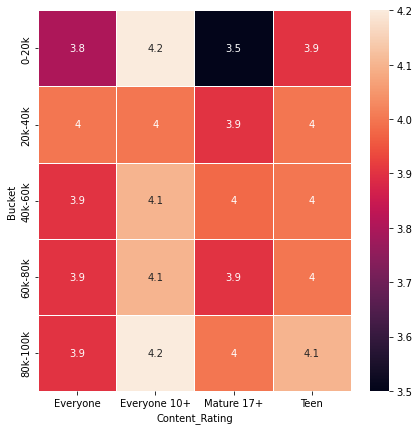

In [101]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(quant, annot=True, linewidths=.5)
plt.show()

### ii. Greens color map

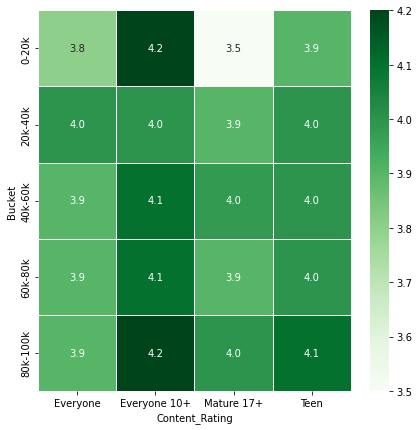

In [103]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(quant, annot=True, cmap='Greens', linewidths=.5, fmt='.1f')
plt.show()


# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

From this analysis and plot, we can see that the lighter apps are not preffered in all the categories. Apps with size 40k-60k and 80k-100k have more ratings and also we can say that the size 60k-80k also has the high ratings. So, in short we can say that, whatever the heavier apps are there, they are preferred more in all the caregories